<a href="https://colab.research.google.com/github/Gaurav2912/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1q12QkUJV93coNY1p2iQV15UHxfkH4na0" align="left" hspace="25px" vspace="20px" width="40" height="50" ></p>


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


![](https://miro.medium.com/max/828/0*bepdYypteRGfqJYP.jpg)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1pNPWpgMSrFyFEo7TLhqOZXnSTicDLHLe" align="left" hspace="10px" vspace="10px" width="55" height="65" ></p>



## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Roadmap**

![](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/bike_sharing_34496d0e96.png)

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import numpy as np
from numpy import math
import time
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
import scipy as sp

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For displaying ploty plot in colab nootbook
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
# Read the csv file
path = "/content/drive/MyDrive/Colab Notebooks/capstone project/Bike Sharing Demand Prediction/"
df = pd.read_csv(path + "SeoulBikeData.csv",encoding= 'unicode_escape')

In [ ]:
# Head of the data frame
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# tail of the data frame
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Check the dimension of data drame
df.shape

(8760, 14)

This dataset contains 8760 rows and 14 columns.

----
**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data.

---
**Get a quick statistical summary of the numeric columns with .describe()**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.describe(include=[object])

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


# Null Values

In [ ]:
# conferming null values with diffretnt method 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

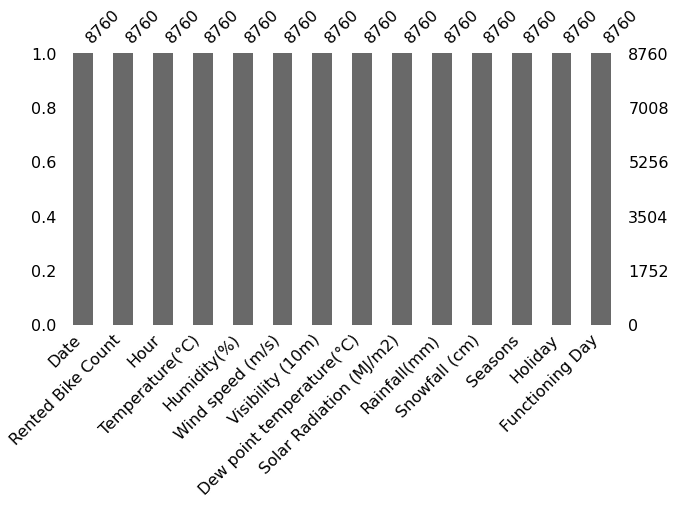

In [ ]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df, figsize= (10,5));

In [ ]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


* From above we can see that, there is not a single missing value anywhere in Data Frame.
* Not a single duplicate entry in data frame.
<br/>

# Feature Engineering

Extract part of date

* Year
* Month
* Day
* Weekday


In [ ]:
# Convert it to datetime object
df['Date'] =  pd.to_datetime(df['Date'])

def add_dateparts(df, col):
  """
  Extract and create year, month, Day, Weekday and Hour
  """

  df['Year'] = df[col].dt.year
  df['Month'] = df[col].dt.month
  df['Day'] = df[col].dt.day
  df['Weekday'] = df[col].dt.weekday

# creating datepart
add_dateparts(df, 'Date')

# Now it is time to drop the feature
df.drop("Date",axis= 1, inplace=True)

# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

In [ ]:
# Checking for unique values 
df.nunique().sort_values()

Year                            2
Functioning Day                 2
Holiday                         2
Seasons                         4
Weekday                         7
Month                          12
Hour                           24
Day                            31
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

# Exploratory Data Analysis

---
Now I will divide this into two parts, once for the count plot and the other for the histogram.

The count plot will have those features which have less than 32 unique values.

In [ ]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17', '#FF5959'])
plt.rcParams['font.size'] = 14

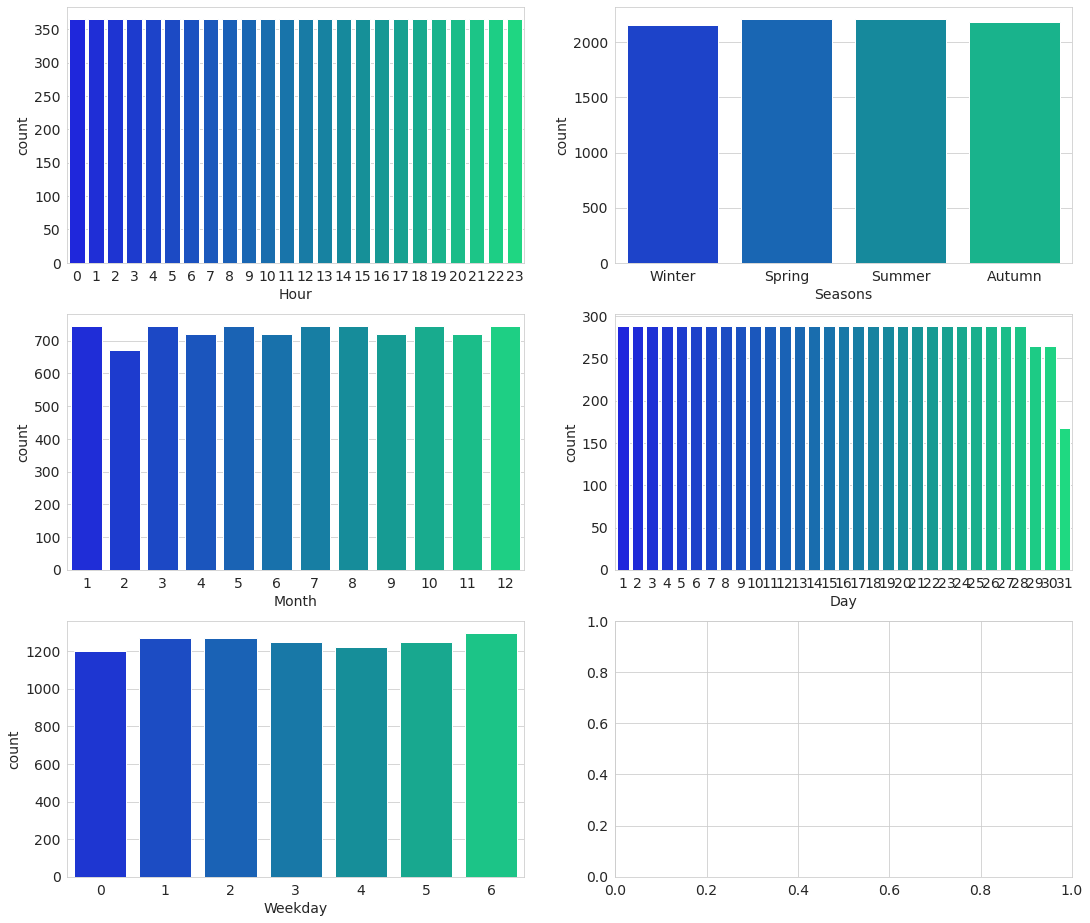

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(18, 16), nrows= 3, ncols= 2)

# non binary feature that have less than 32 unique values 
features_cplot = [col for col in df.columns if  2 < len(df[col].unique()) < 32]

for i, feature in enumerate(features_cplot):
  ax = axes[i//2, i % 2]
  sns.countplot(data= df, x= feature, ax= ax, palette= 'winter')

* According to the count plot, all the values are approximately equal, except for days, because 5 out of 12 months have only 30 days.

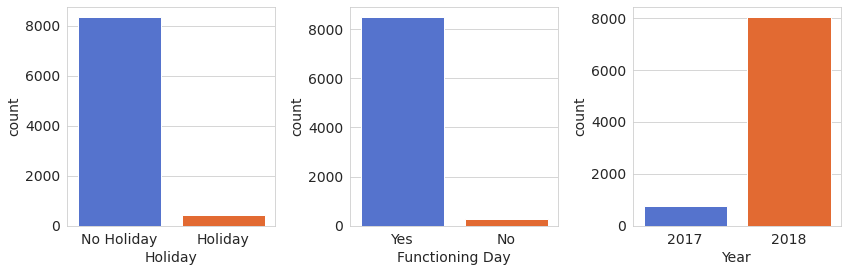

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(12,4), nrows= 1, ncols= 3)

# binary feature 
features_cplot_bin = [col for col in df.columns  if len(df[col].unique()) < 3]

for i, feature in enumerate(features_cplot_bin):
  sns.countplot(data= df, x = feature, ax = axes[i])

plt.tight_layout();

* Binary variables are highly imbalanced.
   * Few holidays, most working days.
   * Most of the information is from 2018.

In [ ]:
# histogram
fig = px.histogram(df, x='Rented Bike Count', marginal="box", 
                   title="Histogram of Rented Bike Count")

fig.show()

* Target variable is positively skewed, also have few outliers.

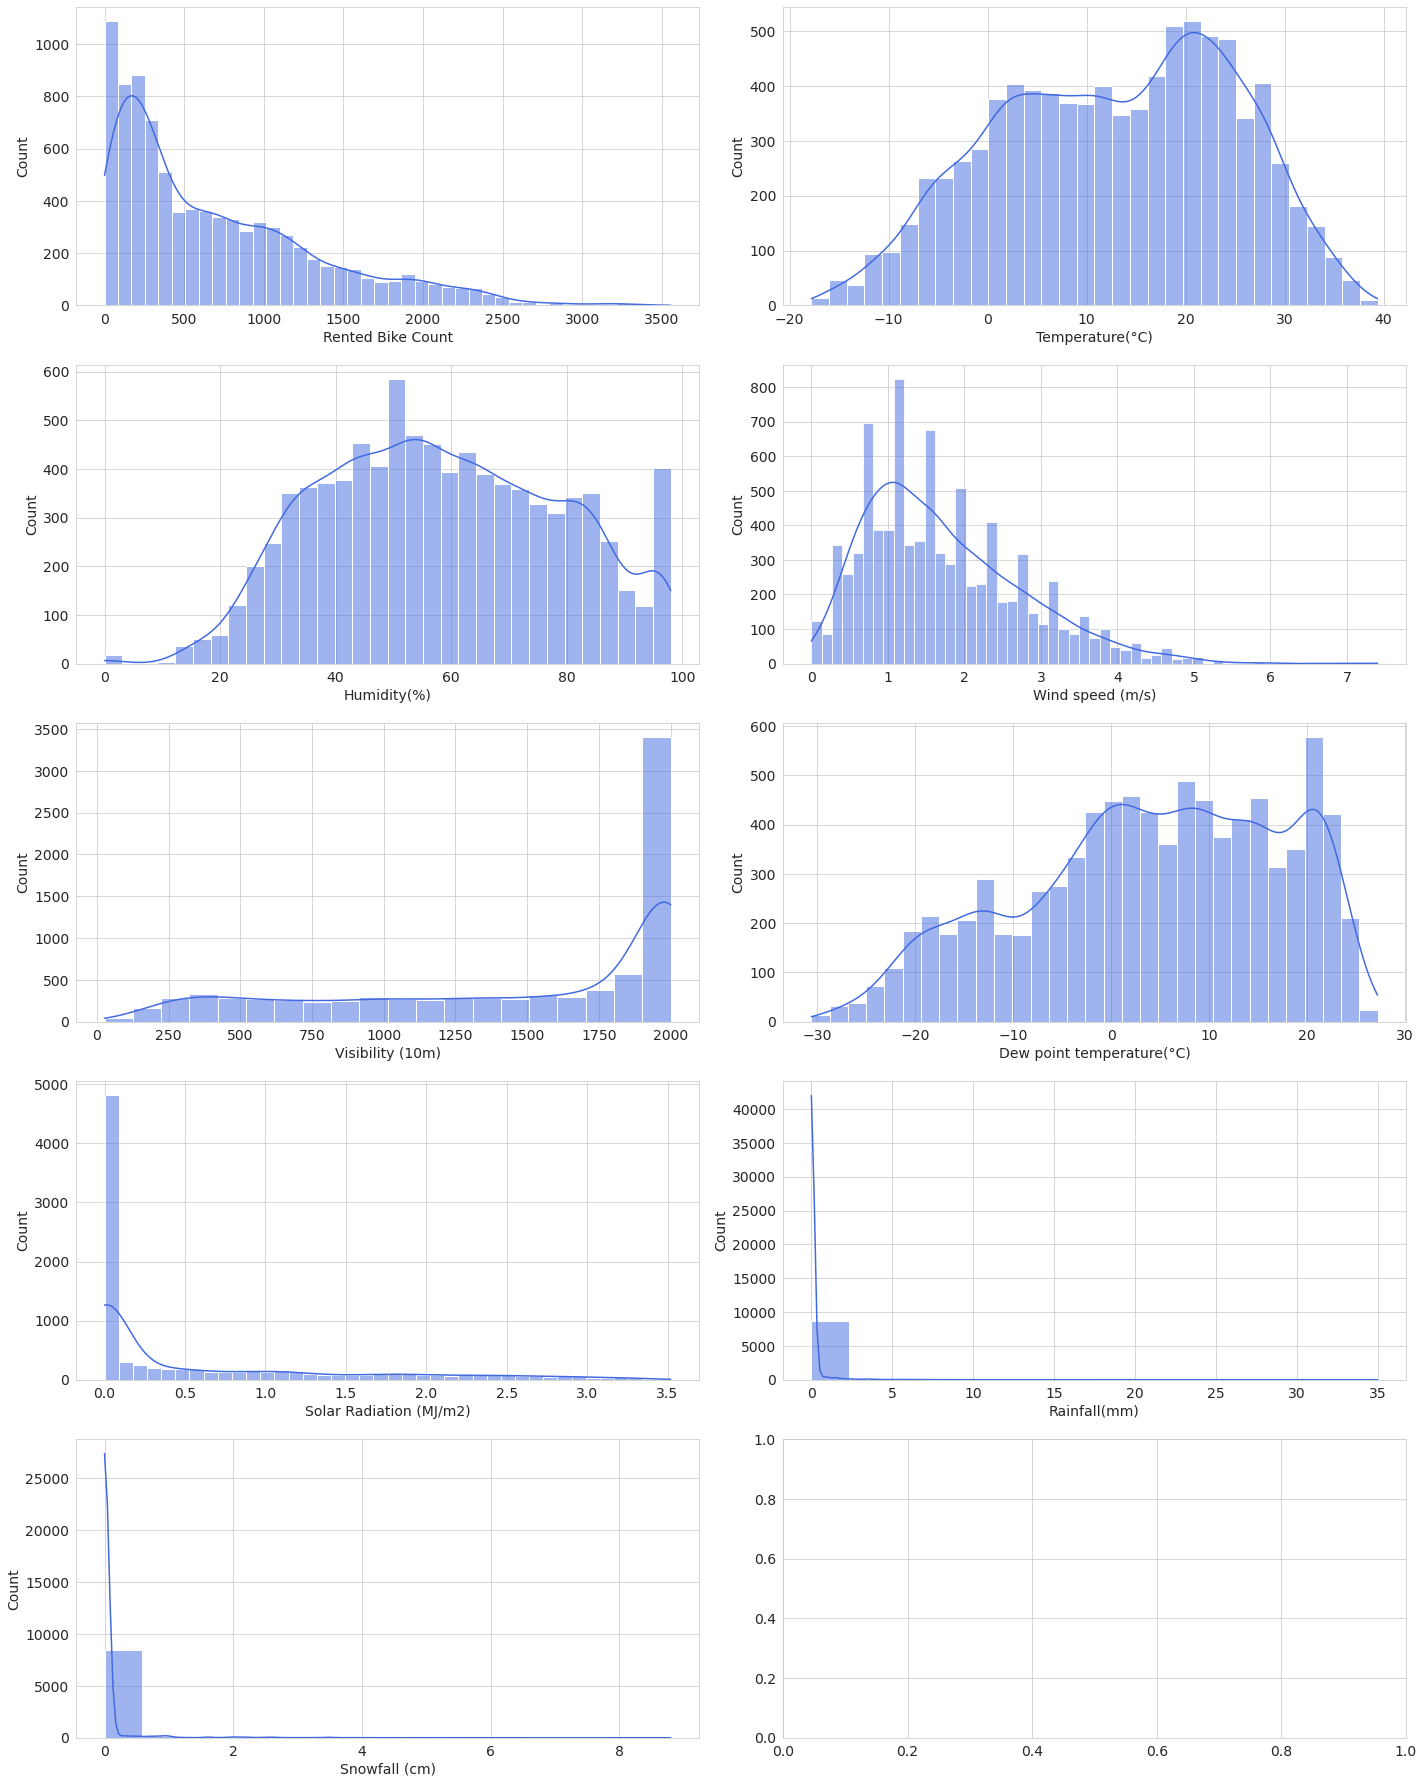

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(20, 25), nrows= 5, ncols= 2)

# feature that have grater than 32 unique values
features_hist = [col for col in df.columns  if len(df[col].unique()) > 32]

# Histogram of Numeric Features in the list
for i, feature in enumerate(features_hist):
  ax = axes[i//2, i % 2]
  sns.histplot(data= df, x = feature, ax = ax, kde= True)

plt.tight_layout();

Positively skewed features 
* Rented Bike Count
* Wind speed (m/s)
* Solar Radiation (MJ/m2)
* Rainfall(mm)
* Snowfall (cm)

Negatively skewed features 
* Visibility (10m)


In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

# Correlation check


Before doing Correlation check, we need to do one hot encoding for categorical variables.


In [ ]:
# converting Year feature from int data type to string format
df["Year"]= df["Year"].astype(str)

In [ ]:
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature
df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features (including boolean datatype)

In [ ]:
# to create dummy variables, drop_firt is for one hot-encoding
df_objs_encoded = pd.get_dummies(df_objs, drop_first= True)

# concatinate state , numeric and object (after one-hot encoding)  columns 
df_final = pd.concat([df_nums, df_objs_encoded], axis= 1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Month                      8760 non-null   int64  
 11  Day                        8760 non-null   int64  
 12  Weekday                    8760 non-null   int64  
 13  Seasons_Spring             8760 non-null   uint8

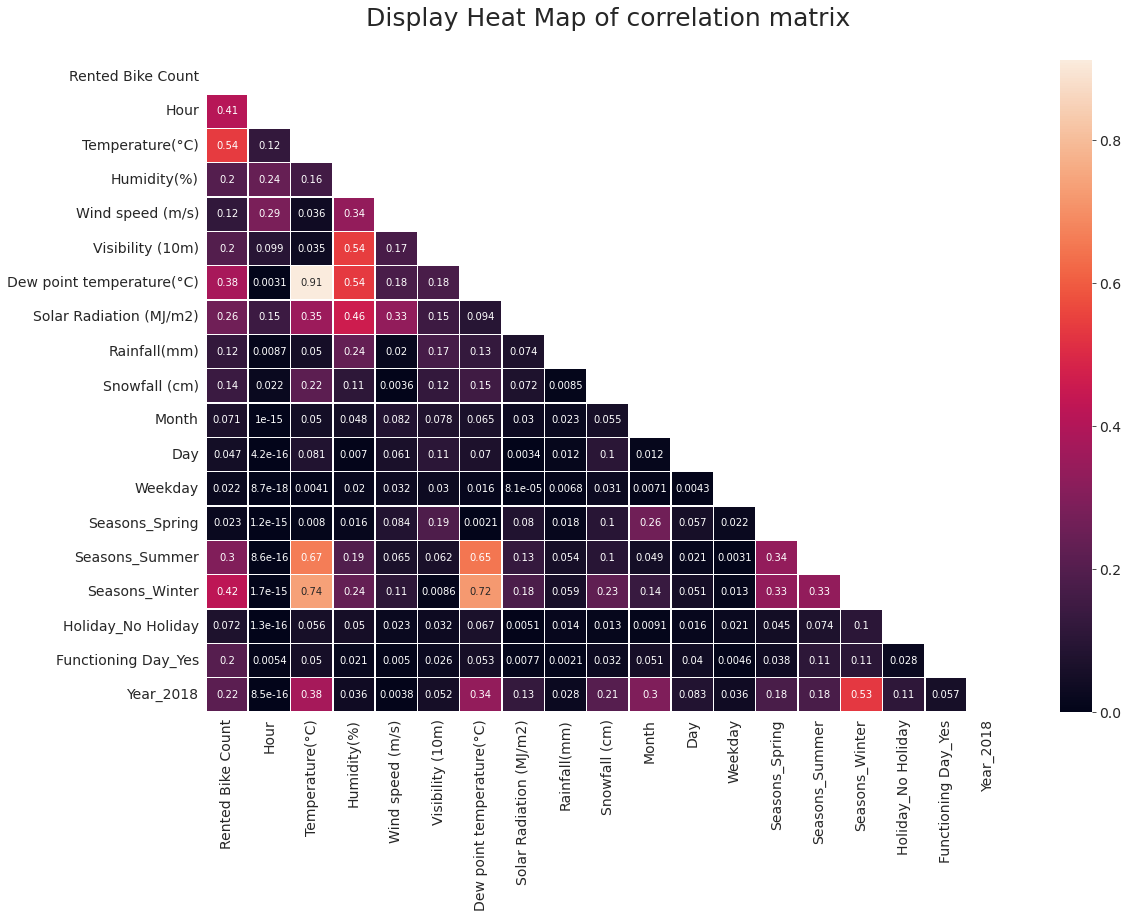

In [ ]:
# for finding correlation matrix , using .corr() method
corr_df = df_final.corr()

# Creates a blanck canvas
plt.figure(figsize= (18,12))

# creating mask for lower triangular matrix
mask = np.triu(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(abs(corr_df), annot= True, annot_kws={"size":10}, mask= mask, linewidth= .5)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

* Temperature and Dew point temperature are highly correlated.

In [ ]:
# correlation with target variable
corr_to_label  = corr_df['Rented Bike Count'].sort_values(ascending= False).iloc[1:]  # first value is 1 (self correlation), so we ignoring it. 
corr_to_label  

Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Seasons_Summer               0.296549
Solar Radiation (MJ/m2)      0.261837
Year_2018                    0.215162
Functioning Day_Yes          0.203943
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Holiday_No Holiday           0.072338
Month                        0.070861
Day                          0.046849
Seasons_Spring               0.022888
Weekday                     -0.021577
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Seasons_Winter              -0.424925
Name: Rented Bike Count, dtype: float64

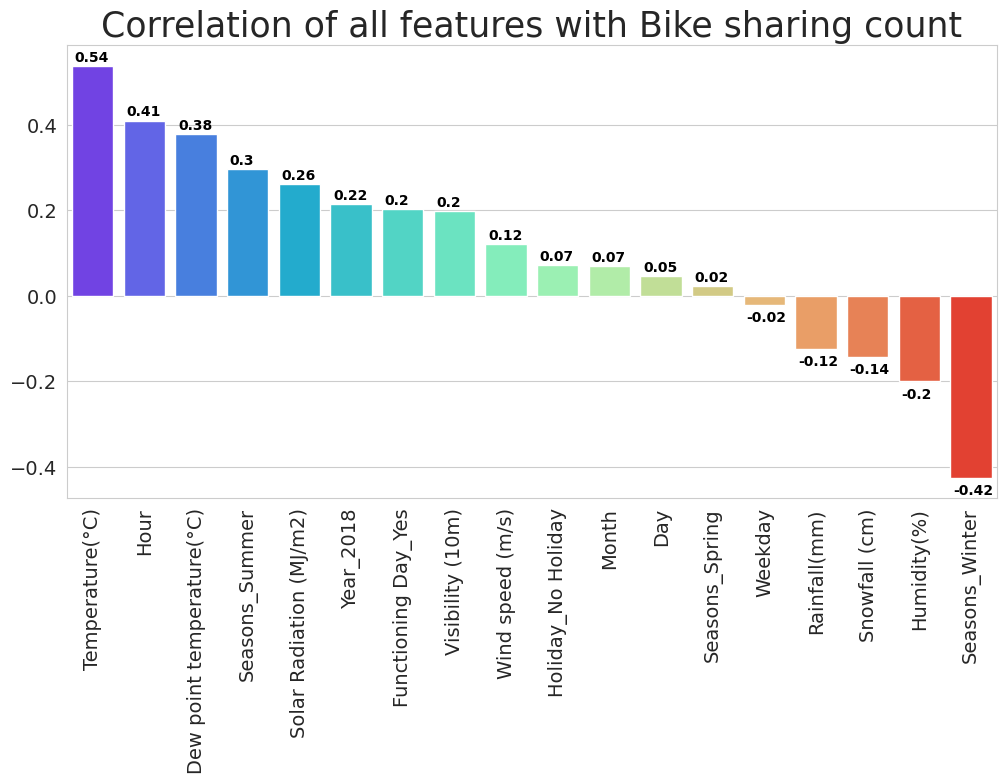

In [ ]:
# Creates a blanck canvas
plt.figure(figsize=(12,6), dpi= 100)

# bar plot for correlation value of all features with target variable
sns.barplot(x=corr_to_label.index,y= corr_to_label.values, palette= 'rainbow')

#  add title
plt.title("Correlation of all features with Bike sharing count", fontsize= 25)

# writing text on plot
for i in range(len(corr_to_label)):

  # positive values are on top of bar 
  if corr_to_label.iloc[i] > 0:
    plt.text(x= i- 0.35,y= corr_to_label.iloc[i] + 0.01,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black', weight='bold')
  
  # negative values are just below the bar
  else:
     plt.text(x= i- 0.35,y= corr_to_label.iloc[i]- 0.04,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black', weight='bold')

# rotating test on x-axis  
plt.xticks(rotation=90);

* Postive correlation of Rented bike count with Hour, Temperature,Dew point Temperature, Solar Radiaton, Seasons_Summer.

* Bike sharing count is negatively correlated to Humidity, Snowfall, Rainfall and Season_Winter.

<br/>

---


**Boxplot of categorical featute with Ranted Bike Count.**

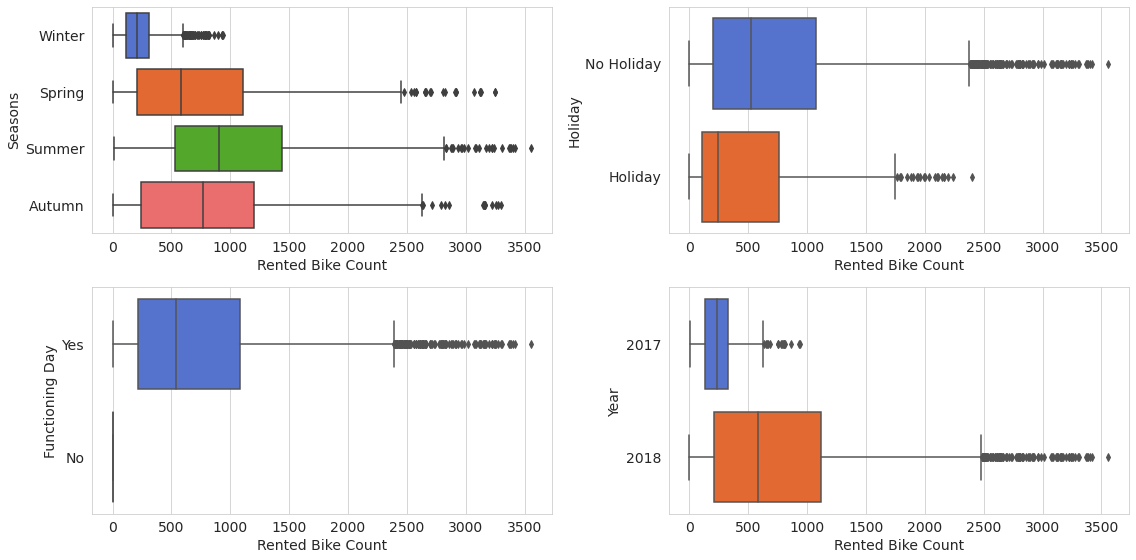

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(16,8), nrows= 2, ncols= 2)

for ind, feature in enumerate(df_objs.columns):
  ax = axes[ind // 2, ind % 2]
  sns.boxplot(data= df, y= feature, x= 'Rented Bike Count', ax= ax, orient= 'h')

plt.tight_layout();

  1. Summer is the most preferred season to rent a bike and winter is the least.
  2. People prefer to book bikes on working days rather than holidays.
  3. All bikes were hired on working day.
  4. People booked more bikes in 2018 than in 2017.

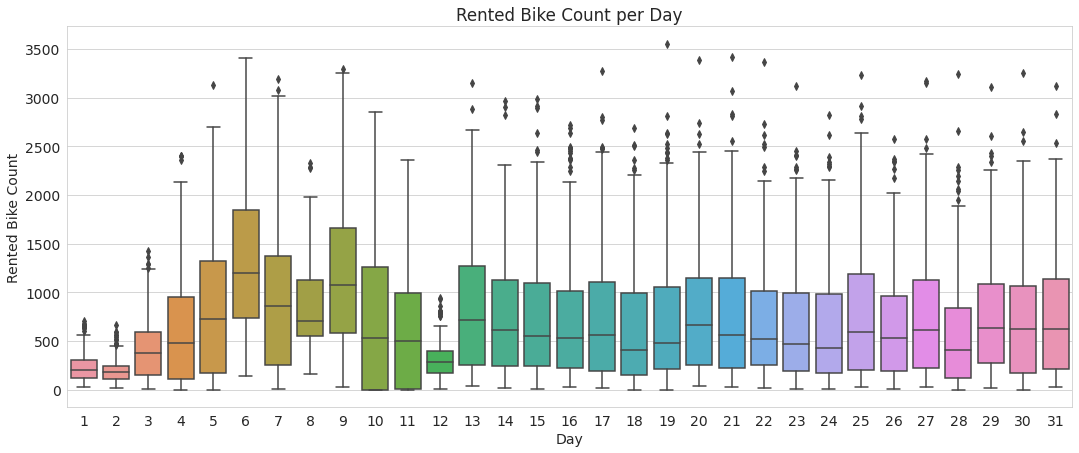

In [ ]:
plt.figure(figsize= (18,7))

sns.boxplot(data= df, x= 'Day', y= 'Rented Bike Count')
plt.title('Rented Bike Count per Day');

* 1, 2 and 12 date is least preferred day and 6 and 9 is the most.

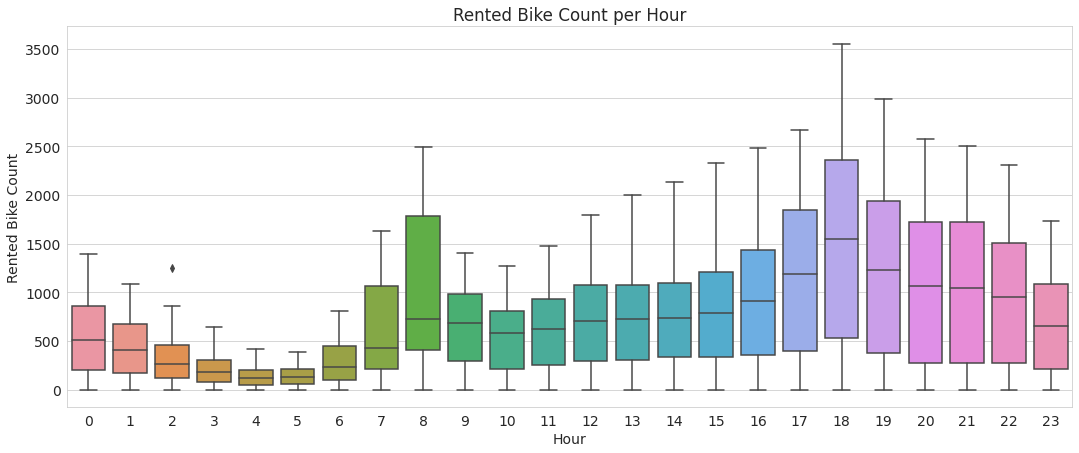

In [ ]:
plt.figure(figsize= (18,7))

sns.boxplot(data= df, x= 'Hour', y= 'Rented Bike Count')
plt.title('Rented Bike Count per Hour');

* Bike sharing is at its peak at 6pm and high between 4pm to 10pm.

* Bike shaing is least between 4am-6am.

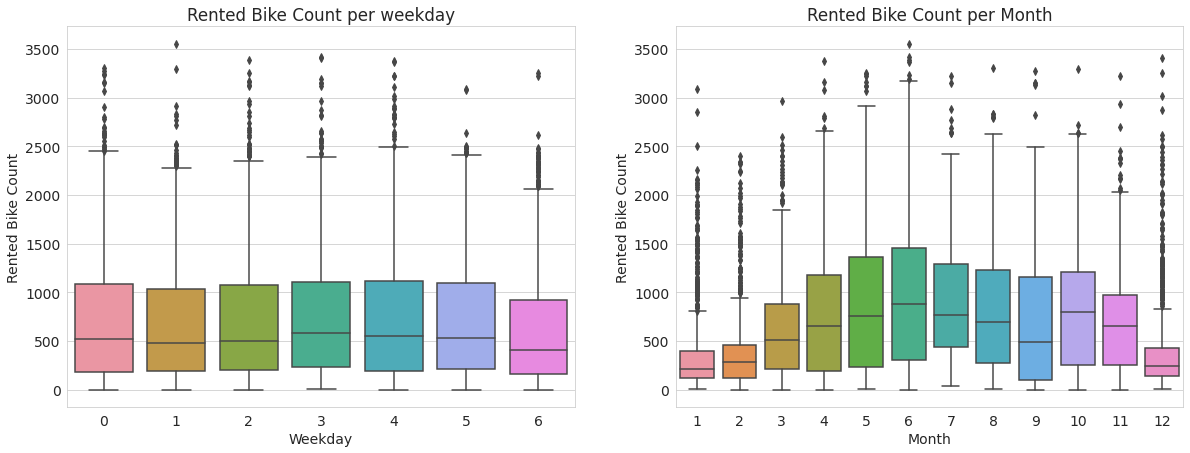

In [ ]:
fig, axes = plt.subplots(figsize=(20,7), nrows= 1, ncols= 2)

sns.boxplot(data= df, x= 'Weekday', y= 'Rented Bike Count', ax= axes[0]).set_title("Rented Bike Count per weekday")
sns.boxplot(data= df, x= 'Month', y= 'Rented Bike Count' , ax= axes[1]).set_title("Rented Bike Count per Month");

* June is the most preferred Month for bike sharing, july and May are the second best and least in December and January.
* Weeday have no impact on bike sharing count.
---

**Regression plots of Rented Bike Count with numeric features**

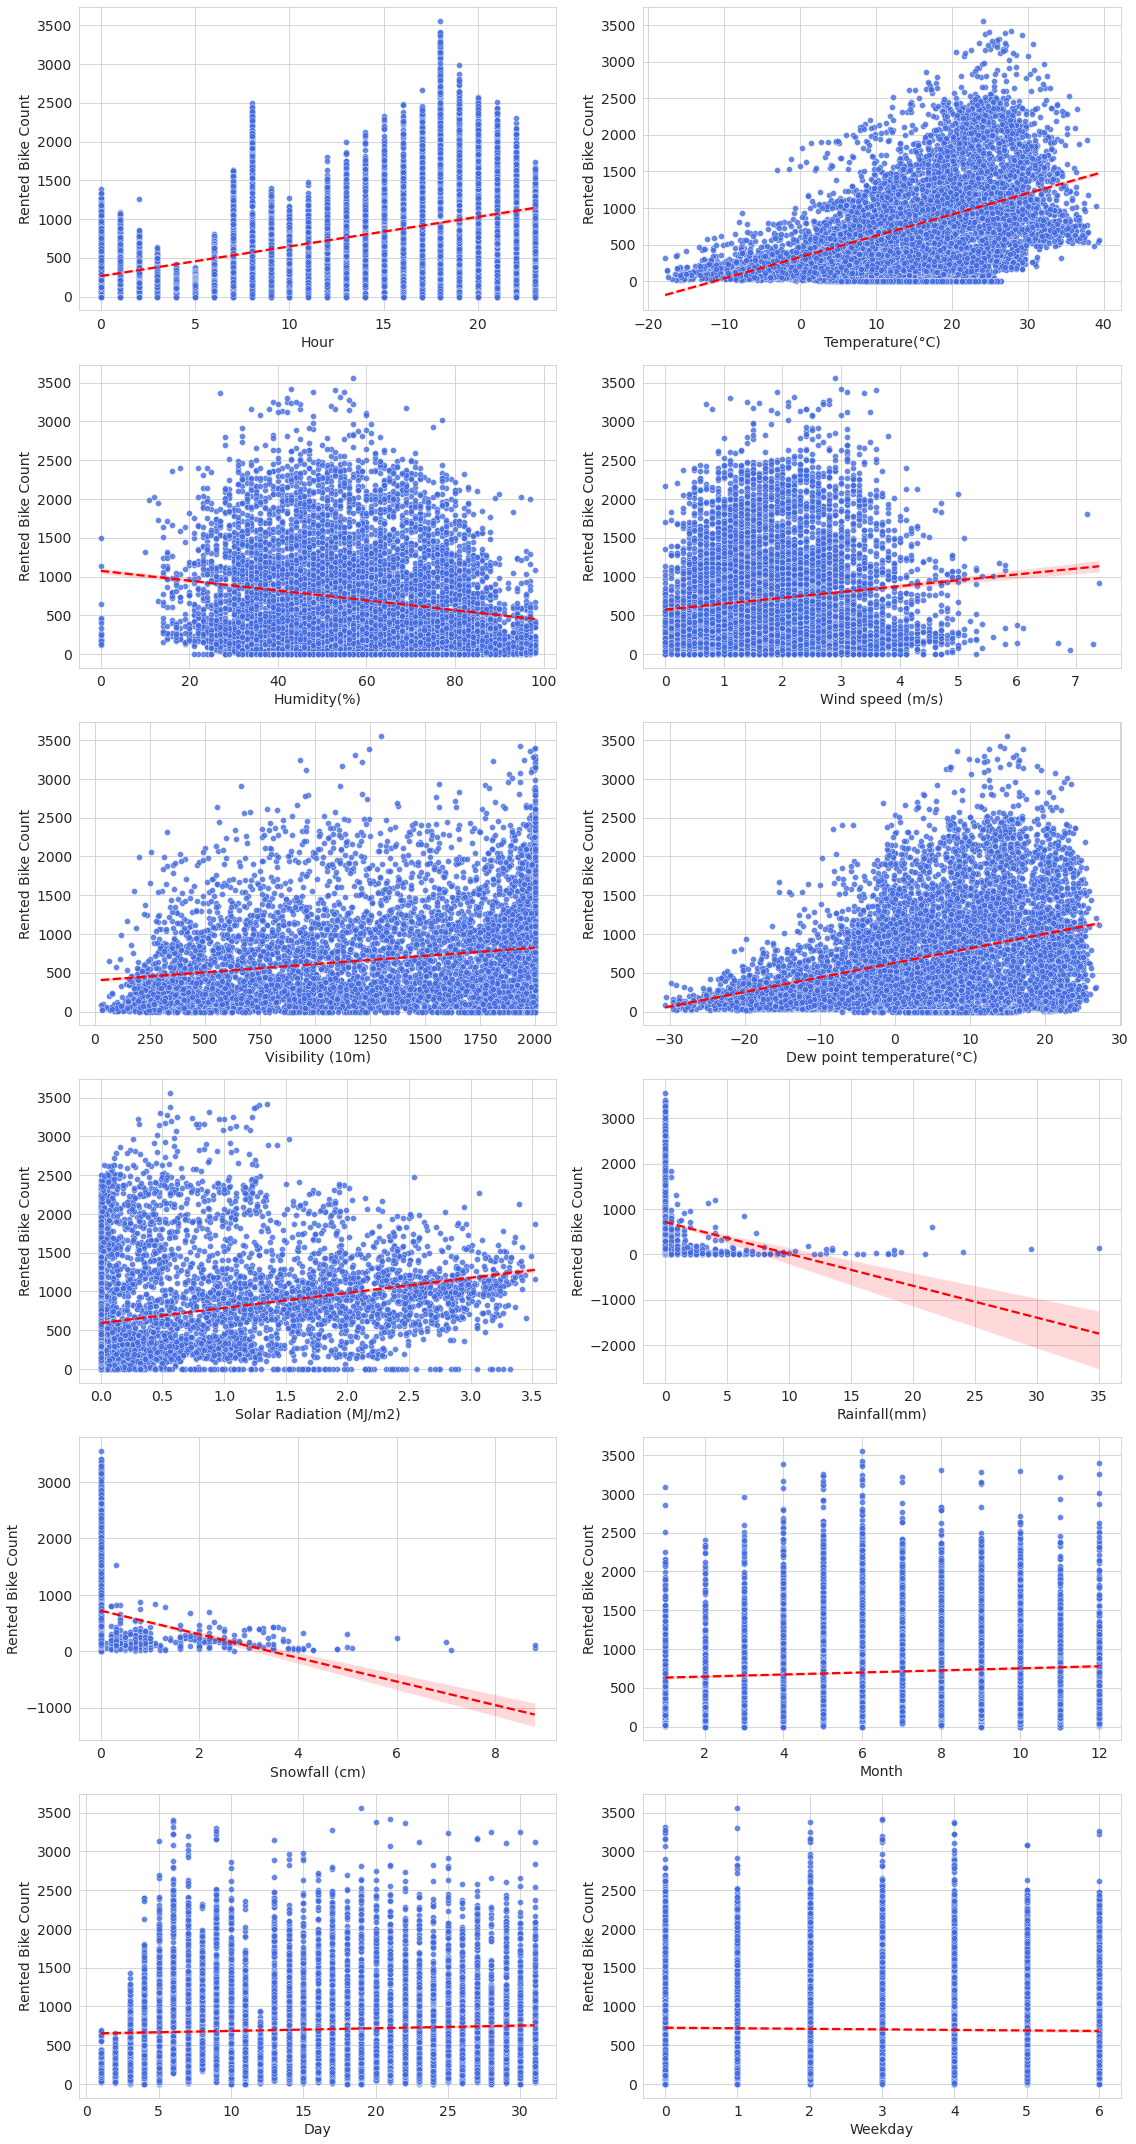

In [ ]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(16,30), nrows= 6, ncols= 2)

nums_cols = [col for col in df_nums.columns if col not in ['Rented Bike Count']]

for ind, feature in enumerate(nums_cols):
  ax = axes[ind // 2, ind % 2]
  sns.regplot(data= df, x= feature, y= 'Rented Bike Count', ax= ax, 
              line_kws={"color": "red", 'ls': '--'}, 
              scatter_kws = {'linewidths': 0.4, 'edgecolors': 'white'})

plt.tight_layout();

We can match the trends in regression plot with correlation bar plot.

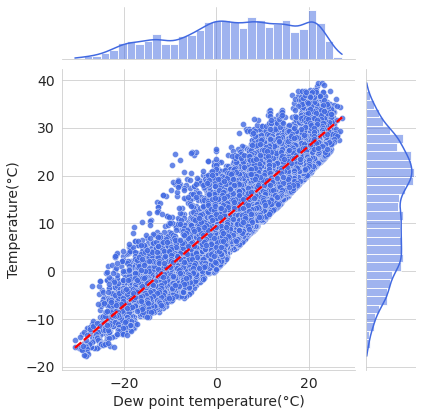

In [ ]:
# joint regression plot of most correlated features
sns.jointplot(data= df, x= 'Dew point temperature(°C)', y= 'Temperature(°C)', kind= 'reg',
              line_kws={"color": "red", 'ls': '--'}, 
              scatter_kws = {'linewidths': 0.4, 'edgecolors': 'white'});

**Transformation of dependent variable to reduce its skewness**

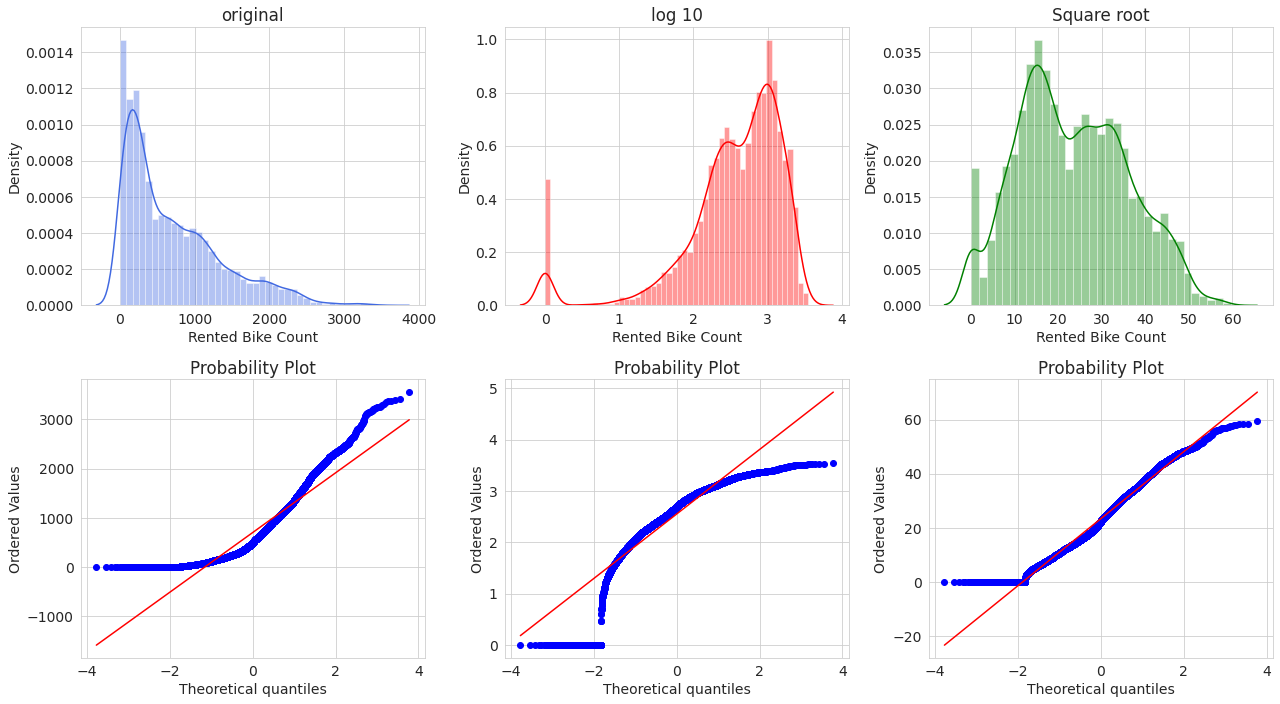

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(18, 10))

# original
sns.distplot((df['Rented Bike Count']),ax=axes[0,0]).set_title("original")
_ = sp.stats.probplot(df['Rented Bike Count'],plot=axes[1,0])

# Log transformation
sns.distplot(np.log10(df['Rented Bike Count'] + 1),ax=axes[0,1],color='red').set_title("log 10")
_ = sp.stats.probplot(np.log10(df['Rented Bike Count'] + 1), plot=axes[1,1])

# Sqrt transformation
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[0,2], color='green').set_title("Square root")
_ = sp.stats.probplot(np.sqrt(df['Rented Bike Count']) ,plot=axes[1,2])

plt.tight_layout();

* From histogram and Q-Q plot, Sqrt transformation graph is close to normal distribution compare to others  

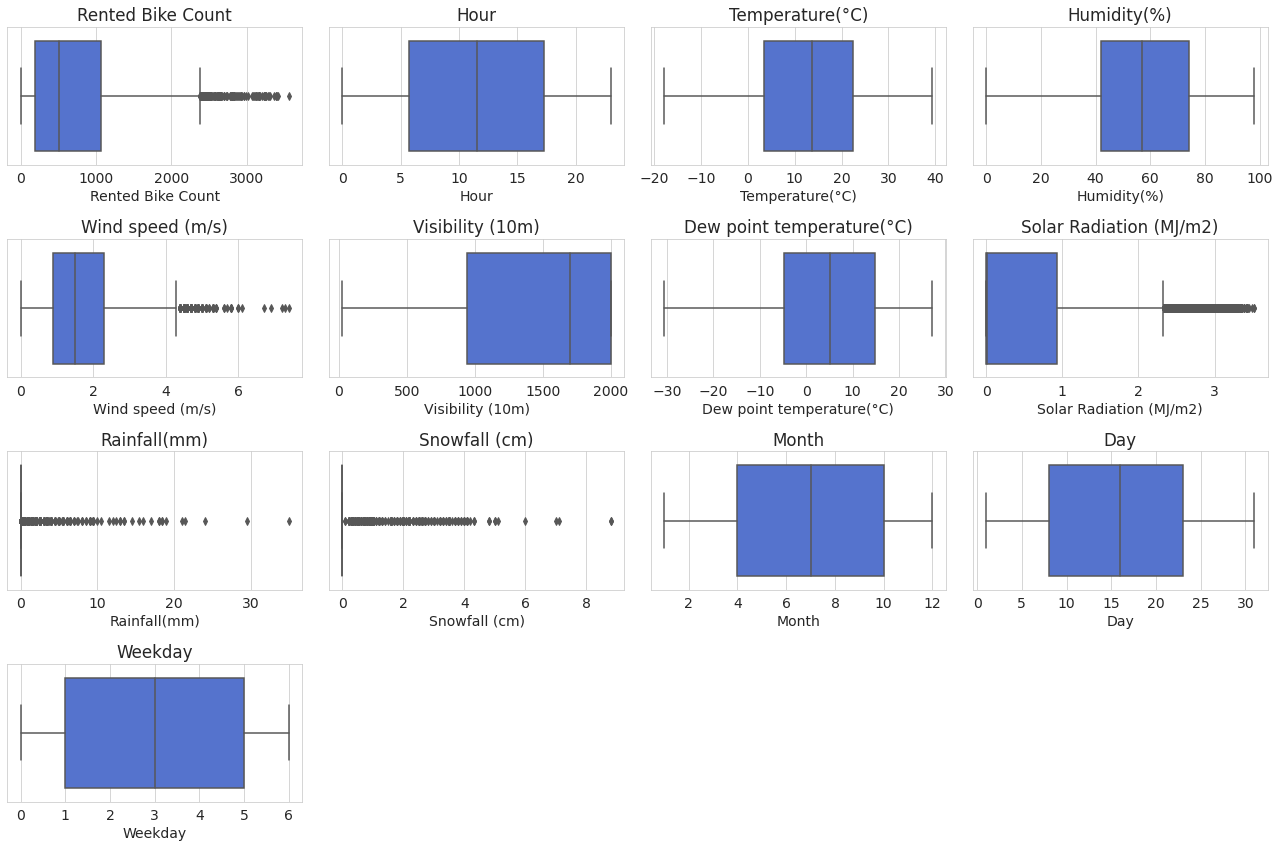

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(18,12))

for col in df_nums.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(df[col])
  plt.title(col)
  plt.tight_layout()

# Prepare the Dataset for Training


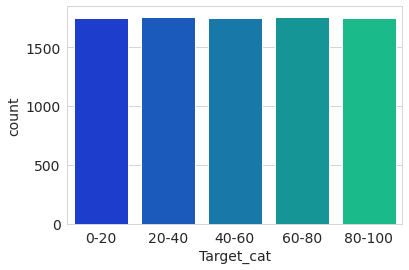

In [ ]:
# Dividing the target variable into 5 equal percentile for stratification
q20, q40, q60, q80 = df_final["Rented Bike Count"].quantile([0.2, 0.4, 0.6, 0.8])

df_final["Target_cat"] = pd.cut(df_final["Rented Bike Count"], bins=[-1., q20, q40, q60, q80, np.inf],
                            labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

sns.countplot(data= df, x= df_final["Target_cat"], palette= 'winter');

In [ ]:
# StratifiedShuffleSplit is better than random train test split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

# Stratified split on "Target_cat"
for train_index, test_index in split.split(df_final, df_final["Target_cat"]):
  strat_train_set = df_final.loc[train_index]
  strat_test_set = df_final.loc[test_index]

In [ ]:
# train and test data is splited in Stratified manner
strat_test_set["Target_cat"].value_counts() / len(strat_test_set)

20-40     0.200913
0-20      0.200000
60-80     0.200000
40-60     0.199543
80-100    0.199543
Name: Target_cat, dtype: float64

In [ ]:
# train data
X_train = strat_train_set.drop(['Target_cat', 'Rented Bike Count'], axis= 1)
y_train = np.sqrt(strat_train_set['Rented Bike Count'])  # sqrt transformation 

# test data
X_test =  strat_test_set.drop(['Target_cat', 'Rented Bike Count'], axis= 1)
y_test = np.sqrt(strat_test_set['Rented Bike Count'])  # sqrt transformation

In [ ]:
# MinMax scaling the data
scaler= MinMaxScaler()

# fit-transform on training data
scaled_X_train = scaler.fit_transform(X_train)
# only transform on test data to prevent data leakage 
scaled_X_test = scaler.transform(X_test)

In [ ]:
#  dictionary of models that we are going to use for this dataset
models_dict = {
    "Linear Regression" :           LinearRegression(),
    "Lasso Regression" :            Lasso(),
    "Ridge Regression" :            Ridge(),
    "Decision Tree Regressor" :     DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor" :     RandomForestRegressor(random_state=42),
    "Extra Tree Regressor" :        ExtraTreesRegressor(random_state=42),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(random_state=42),
    "XGB Regressor" :               xgb.XGBRegressor(random_state=42),
    "Light-GBM" :                   lightgbm.LGBMRegressor(random_state=42),
    "LinearSVR" :                   LinearSVR()
}


def model_performance(train_X, test_X, train_y, test_y, models= models_dict):
  """
  return dictionary of each model performance.
  """

  # dictionary that we want to return
  models_data = {
      'Name': [],                   # Name of that model
      'time_taken': [],      # time taken in training, predicting and calulation of errors
      'train_RMSE': [],             # root mean square error of training set
      'train_MAE': [],              # mean square error
      'train_R2_Score': [],         # accuracy of testing set
      'test_RMSE' : [],             # 
      'test_MAE' : [],
      'test_R2_Score' : [],
      'trained_model': []           # trained (fitted) model on training data 
  }

  # models argument in this function is dictionary of ML models with their names 
  for model_name, model_type in models.items():
    
    print(f"We are at {model_name}")

    models_data["Name"].append(model_name)

    # statring time
    tic = time.time() 
  
    # fit on train data
    model_type.fit(train_X, train_y)
    
    models_data['trained_model'].append(model_type)

    # Training set, first perdict then calculate MAE, RMSE, R2_Score 
    train_y_pred = model_type.predict(train_X)
    train_MAE = mean_absolute_error(train_y, train_y_pred)
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_y_pred))
    train_R2_score = r2_score(train_y, train_y_pred)

    models_data["train_MAE"].append(train_MAE)
    models_data["train_RMSE"].append(train_RMSE)
    models_data["train_R2_Score"].append(train_R2_score)

    # Test set
    test_y_pred = model_type.predict(test_X)
    test_MAE = mean_absolute_error(test_y, test_y_pred)
    test_RMSE = np.sqrt(mean_squared_error(test_y, test_y_pred))
    test_R2_score = r2_score(test_y, test_y_pred)

    models_data["test_MAE"].append(test_MAE)
    models_data["test_RMSE"].append(test_RMSE)
    models_data["test_R2_Score"].append(test_R2_score)

    #end time
    tac = time.time()

    models_data["time_taken"].append(tac - tic)

    # loop ended

  return models_data

In [ ]:
models_dict = model_performance(scaled_X_train, scaled_X_test, y_train, y_test)

We are at Linear Regression
We are at Lasso Regression
We are at Ridge Regression
We are at Decision Tree Regressor
We are at Random Forest Regressor
We are at Extra Tree Regressor
We are at Gradient Boosting Regressor
We are at XGB Regressor
[09:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
We are at Light-GBM
We are at LinearSVR


In [ ]:
# creating a dataframe from that dictionary and sort on the basis of test accuracy
performance_df = pd.DataFrame(models_dict).sort_values(by= 'test_RMSE') 
performance_df

,Name,time_taken,train_RMSE,train_MAE,train_R2_Score,test_RMSE,test_MAE,test_R2_Score,trained_model
8,Light-GBM,0.319835,2.396150e+00,1.645085e+00,0.962730,3.106589,2.075613,0.938870,LGBMRegressor(random_state=42)
5,Extra Tree Regressor,2.585987,3.580581e-14,2.722706e-14,1.000000,3.125349,2.010098,0.938129,"(ExtraTreeRegressor(random_state=1608637542), ..."
4,Random Forest Regressor,4.144266,1.290775e+00,8.460237e-01,0.989185,3.290430,2.167076,0.931421,"(DecisionTreeRegressor(max_features='auto', ra..."
6,Gradient Boosting Regressor,1.151235,4.123270e+00,2.958601e+00,0.889640,4.258158,3.062165,0.885150,([DecisionTreeRegressor(criterion='friedman_ms...
7,XGB Regressor,0.584328,4.136814e+00,2.960354e+00,0.888914,4.271343,3.073304,0.884437,XGBRegressor(random_state=42)
3,Decision Tree Regressor,0.094656,0.000000e+00,0.000000e+00,1.000000,4.807009,2.983816,0.853635,DecisionTreeRegressor(random_state=42)
0,Linear Regression,0.019774,7.299033e+00,5.594860e+00,0.654174,7.293448,5.568323,0.663059,LinearRegression()
2,Ridge Regression,0.006055,7.302993e+00,5.606427e+00,0.653798,7.304228,5.581953,0.662062,Ridge()
9,LinearSVR,0.018683,7.426801e+00,5.630695e+00,0.641960,7.467615,5.642046,0.646775,LinearSVR()
1,Lasso Regression,0.007600,1.075037e+01,8.489260e+00,0.249804,11.036187,8.699179,0.228517,Lasso()


## Hyperparameter Tuning

In [ ]:
# Custom Function for Performance Metrics
def model_performance(reg_model, train_X= scaled_X_train, test_X= scaled_X_test, 
                      train_y=  y_train, test_y= y_test):
  """
  print performance metrics of regression model like MAE, RMSE, R2_score 
  """

  for (label, X, y) in [('training',train_X, train_y), ('testing',test_X, test_y)]:

    y_pred = reg_model.predict(X)
    MAE = mean_absolute_error(y, y_pred)
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    R2_score = r2_score(y, y_pred)

    print("_" * 120)
    print(f"For {label} data")
    print('Mean value of Rented Bike Count', df['Rented Bike Count'].mean())
    print('Mean Absolute Error (RMSE): ', MAE)
    print('Root Mean Squared Error (RMSE): ', RMSE)
    print('R2 Score is: ', R2_score)


In [ ]:
def hyperparameter_tuning(reg_model, param_grid, train_X= scaled_X_train, 
                          test_X= scaled_X_test, train_y= y_train, test_y= y_test):
  """
  Take model and its hyperparameters as input and return best fitted model
  """

  #  Grid Search object
  grid_search = GridSearchCV(
          estimator= reg_model,
          param_grid= param_grid,
          scoring= 'r2',
          cv= 3,
          n_jobs= -1,
          verbose= 1
  )

  # Strat
  tic = time.time()

  # fit on grid search
  grid_search.fit(train_X, train_y)

  # End
  tac = time.time()

  print(f"Time taken in hyper-parameter tuning : {round(tac-tic, 2)} sec")   
  print(120 * '_', end= '\n' * 2)

  # we dont want clf_model__ 
  print("Best Parameters are")
  for key, val in  grid_search.best_params_.items():
    print(f"{key} : {val}")
  
  print(120 * '_', end= '\n' * 2)
  # calculate accuracy with test data
  r2 = grid_search.score(test_X, test_y)
  
  print(f"Best R2 Score is {r2}")

  return grid_search

In [ ]:
extree = ExtraTreesRegressor(random_state=42)              
# Create the random grid
extree_grid ={'bootstrap': [True, False],
              'max_depth': [30, 50, 70, None],
              'n_estimators': [100, 500, 1000],
              'oob_score': [False, True]}


extree_grid_model = hyperparameter_tuning(extree, extree_grid) # take 6 - 6.5 min

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Time taken in hyper-parameter tuning : 584.79 sec
________________________________________________________________________________________________________________________

Best Parameters are
bootstrap : False
max_depth : 30
n_estimators : 1000
oob_score : False
________________________________________________________________________________________________________________________

Best R2 Score is 0.9396794303332136


In [ ]:
# performance metrics of ExtraTreesRegressor after hyperparameter tuning
model_performance(extree_grid_model.best_estimator_)

________________________________________________________________________________________________________________________
For training data
Mean value of Rented Bike Count 704.6020547945205
Mean Absolute Error (RMSE):  0.0002936595460090936
Root Mean Squared Error (RMSE):  0.0012614247010877117
R2 Score is:  0.9999999896711942
________________________________________________________________________________________________________________________
For testing data
Mean value of Rented Bike Count 704.6020547945205
Mean Absolute Error (RMSE):  1.9873082283687886
Root Mean Squared Error (RMSE):  3.085947967595319
R2 Score is:  0.9396794303332136


In [ ]:
lgbm = lightgbm.LGBMRegressor(random_state=42)

# Create the random grid
lgbm_grid ={'bootstrap': [True, False],
              'max_depth': [20, 30, 50, None],
              'n_estimators': [100, 800, 1500, 1800]}

lgbm_grid_model = hyperparameter_tuning(lgbm, lgbm_grid)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Time taken in hyper-parameter tuning : 134.19 sec
________________________________________________________________________________________________________________________

Best Parameters are
bootstrap : True
max_depth : 30
n_estimators : 1500
________________________________________________________________________________________________________________________

Best R2 Score is 0.95239859421615


In [ ]:
lgbm_grid_model.best_estimator_

LGBMRegressor(bootstrap=True, max_depth=30, n_estimators=1500, random_state=42)

In [ ]:
# performance metrics of LGBMRegressor after hyperparameter tuning
model_performance(lgbm_grid_model.best_estimator_)

________________________________________________________________________________________________________________________
For training data
Mean value of Rented Bike Count 704.6020547945205
Mean Absolute Error (RMSE):  0.2701454599096883
Root Mean Squared Error (RMSE):  0.40262959187706376
R2 Score is:  0.998947701787407
________________________________________________________________________________________________________________________
For testing data
Mean value of Rented Bike Count 704.6020547945205
Mean Absolute Error (RMSE):  1.7826205371656532
Root Mean Squared Error (RMSE):  2.7413581044981017
R2 Score is:  0.95239859421615


# Final model

In [ ]:
final_model = lgbm_grid_model.best_estimator_

final_model.fit(scaled_X_train , y_train)

LGBMRegressor(bootstrap=True, max_depth=30, n_estimators=1500, random_state=42)

In [ ]:
# Important features or coefficient of the model
final_model.feature_importances_

array([4578, 5835, 4924, 4379, 5795, 5492, 4287,  585,  237, 2204, 3437,
       2339,  283,  166,  124,  137,  125,   73])

In [ ]:
# creating a dataframe for feature importance, sorted from most to least important features
importance_df = pd.DataFrame(index= X_train.columns, data= final_model.feature_importances_,
                             columns=['Importance']).sort_values("Importance", ascending= False)

importance_df

,Importance
Temperature(°C),5835
Visibility (10m),5795
Dew point temperature(°C),5492
Humidity(%),4924
Hour,4578
Wind speed (m/s),4379
Solar Radiation (MJ/m2),4287
Day,3437
Weekday,2339
Month,2204


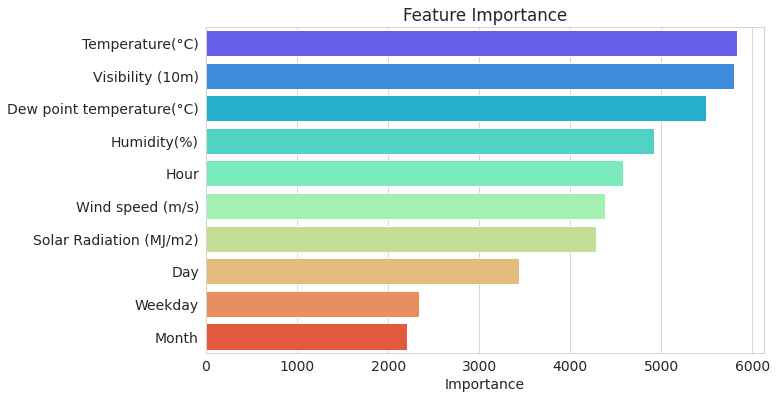

In [ ]:
# Bar plot of Top 10 impartant features
plt.figure(figsize=(10,6))
sns.barplot(data= importance_df[:10], y= importance_df[:10].index, x='Importance', palette= 'rainbow')
plt.title('Feature Importance');

**Residual Analysis**

In [ ]:
# predicted values
y_hat = final_model.predict(scaled_X_test)

# squaring the prediction
actual_count = (y_test.values)**2
pred_count = (y_hat) ** 2

# datafeame for actual and predicted values
df_residual = pd.DataFrame({
    'Actual Bike Rented Count': actual_count,
    'Predicted Bike Rented Count' :  pred_count,
    'residual' : (actual_count - pred_count),
    'abslute residual' : abs(actual_count - pred_count)
})

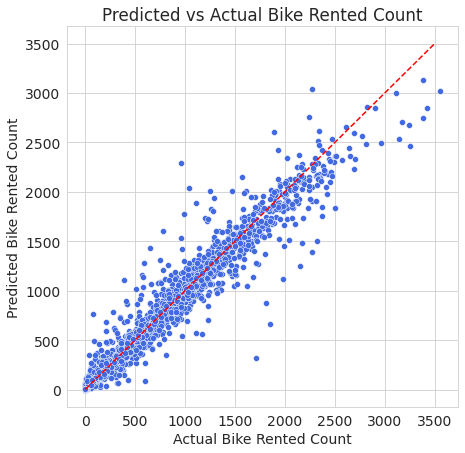

In [123]:
# Scatter plot for Predicted  vs Actual Bike Rented Count
plt.figure(figsize= (7, 7))
sns.scatterplot(data= df_residual, x= 'Actual Bike Rented Count', y= 'Predicted Bike Rented Count')

# stright line for ideal prediction 
plt.plot([0,3500], [0,3500], ls= '--', color= 'red') 
plt.title("Predicted vs Actual Bike Rented Count");

In [124]:
# for more intractive plot, know exact value of each observations
fig = px.scatter(df_residual, x= 'Actual Bike Rented Count', y= 'Predicted Bike Rented Count', 
                 color= 'abslute residual', color_continuous_scale = 'viridis_r')
fig.show()

In [128]:
# Correlation of Prediction and Actual values, for straight line its value is 1
correlation_value = df_residual['Predicted Bike Rented Count'].corr(df_residual['Actual Bike Rented Count'])

# sum of all residual, ideally it shoud be zero
sum_residual = df_residual['residual'].sum()

print(f"Correlation between actual and predicted Bike Rented Count is {correlation_value: .2f}")
print(f"Sum of all residual is {sum_residual: .2f}")

Correlation between actual and predicted Bike Rented Count is  0.97
Sum of all residual is  14967.41


In [ ]:
df_residual['residual'].sum()

14967.413864415405

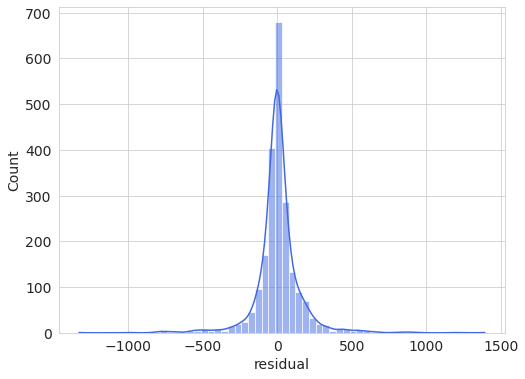

In [130]:
# Histogram of residuals
plt.figure(figsize= (8,6))
sns.histplot(data= df_residual, x= 'residual', kde= True, bins= 60);

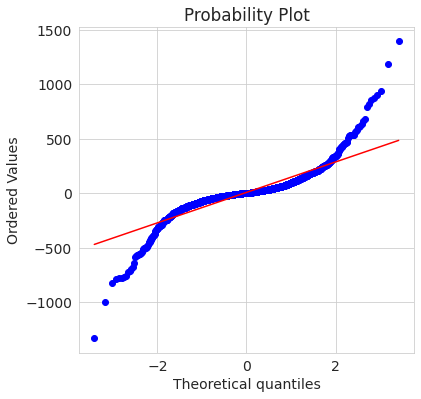

In [131]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,6))
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(df_residual['residual'],plot=ax)

* For normal dristibution, all blue points should lie on red lines.
* Points between -2 to 2 in Theoretical quantiles follow normal distribution.
* points greater than 2 and less than -2 in Theoretical quantiles, show that residual plot have high skewness on both the  side means it have heavy tail compared to normal distribution. 

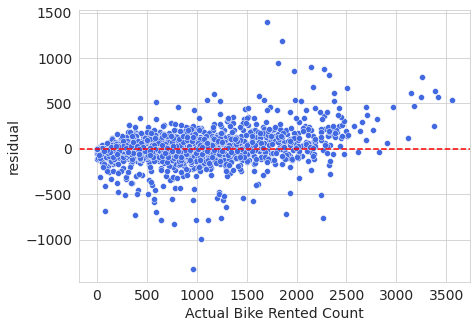

In [ ]:
# residual vs Actual Bike Count
plt.figure(figsize= (7,5))
sns.scatterplot(data= df_residual, x= 'Actual Bike Rented Count', y= 'residual')
plt.axhline(y=0, color='r', linestyle='--');

# Model Persistence (Saving and Loading a Model)

In [ ]:
import joblib

joblib.dump(final_model, 'Bike Sharing Demand Prediction.joblib') 

# The object can be loaded back using joblib.load
loaded_model = joblib.load('Bike Sharing Demand Prediction.joblib')

# SHAP

In [ ]:
!pip install shap

In [ ]:
# This entire code block is to appease the shapley package.  Shapley won't accept
# pipelines, and shapley won't accept categorical features.  The purpose 
# of this code block is to make a copy of my dataframe and do the ordinal encoding 
# manually so that I can successfully access the shapley tools

target = 'Rented Bike Count'

# Creating a new column 'Season' by mapping the 4 seasons in 'Seasons' to integers
# and then dropping the 'Seasons' column
df_copy = df_final

df_copy.drop('Target_cat', axis=1, inplace= True)
# Creating FM and TV
X_shap = df_copy.drop(columns=target)
y_shap = df_copy[target]

# Creating Test and Training splits
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap, test_size = 0.8, random_state=42)

# Creating a model which is intentionally not part of a pipeline

lgbm_modelshap = lightgbm.LGBMRegressor(
    bootstrap=True, 
    max_depth=30, 
    n_estimators=1500, 
    random_state=42)

lgbm_modelshap.fit(X_train_shap, y_train_shap)

LGBMRegressor(bootstrap=True, max_depth=30, n_estimators=1500, random_state=42)

In [132]:
import shap
sample = X_test_shap.iloc[42]
sample

Hour                            7.00
Temperature(°C)                 9.50
Humidity(%)                    72.00
Wind speed (m/s)                0.20
Visibility (10m)             1017.00
Dew point temperature(°C)       4.60
Solar Radiation (MJ/m2)         0.04
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
Month                           3.00
Day                            31.00
Weekday                         5.00
Seasons_Spring                  1.00
Seasons_Summer                  0.00
Seasons_Winter                  0.00
Holiday_No Holiday              1.00
Functioning Day_Yes             1.00
Year_2018                       1.00
Name: 2887, dtype: float64

 99%|===================| 1741/1752 [02:36<00:00]       

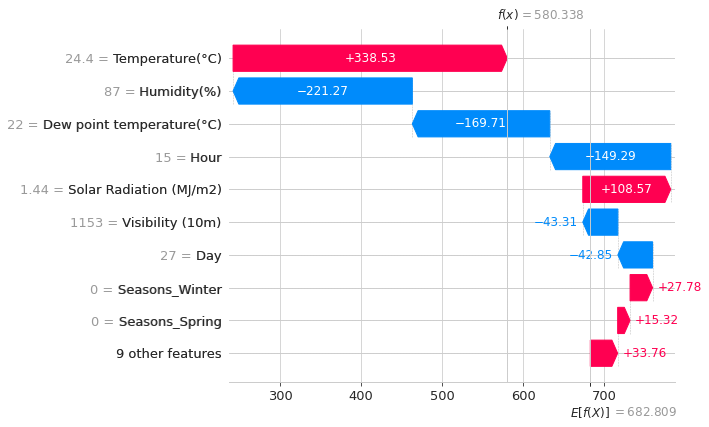

In [133]:
explainer = shap.TreeExplainer(lgbm_modelshap, X_test_shap)
shap_values = explainer(X_train_shap, check_additivity=False)
shap.plots.waterfall(shap_values[42])

- For this observation , predicted value is 580.338 and base value is 682.809 (mean of test data).
- Features in red color features are responsible for increasing the value of prediction, while those in blue are said to decrease the value of prediction.

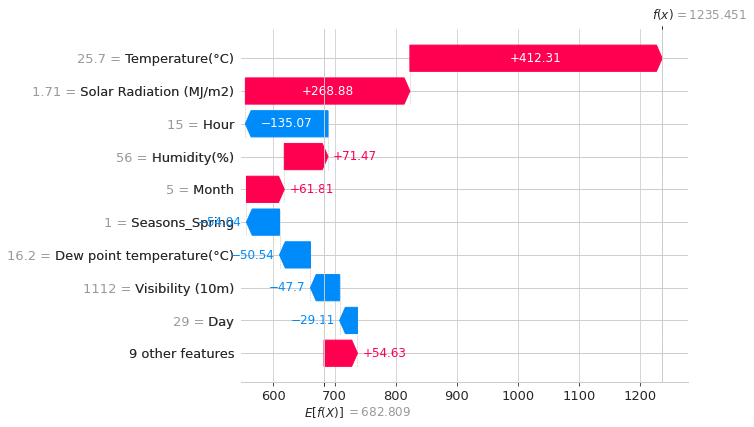

In [141]:
# Another example
shap.plots.waterfall(shap_values[9])

<a href="https://www.freeiconspng.com/img/6071" title="Image from freeiconspng.com"><img src="https://www.freeiconspng.com/uploads/summary-png-icon-1.png" width="70" alt="Free Files Summary" /></a>

# ***Summary*** 
---

>The following topics were covered in this notebook:
- Downloading a real-world dataset
- Looking for null and missing values
- Try to get some insights from data
- Correlation plot
- Data Cleaning, Preprocessing and Feature engineering 
- Preparing a dataset for training
- Training and interpretation with different models
- Overfitting, hyperparameter tuning & regularization
- Predict and calculate sum evaluation metrics for model
- Model Persistence saving and loading the model
- Making predictions on single inputs and its explain it with the help of SHAP.

<br/>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>

#**Overall Conclusion**
----
----
<br/>


* Most numbers of Bikes were rented in Summer, followed by Autumn, Spring, and Winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.
* Majority of the client in the bike rental sector belongs to the Working class. This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.
* Temperature of 20-30 Degrees, evening time 4 pm- 8 pm,Humidity between 40%-60% are the most favorable parameters where the Bike demand is at its peak.
* Temperature, Hour of the day, Solar radiation, and Humidity are major driving factors for the Bike rent demand.
* Feature and Labels had a weak linear relationship, hence the prediction from the linear model was very low. Best predictions are obtained with a LightGBM model with an R2 Score of 0.95